<a href="https://colab.research.google.com/github/ShriVarshaan/pytorch-learning-log/blob/main/pytorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn #nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

##Preparing and loading data

* Excel spreadsheets
* Images
* Video
* audio
* DNA
* Text

And many more

1) get data into numerical representation

2) build a model to learn patterns in that numerical representation

We will start with making a linear regression formula with know parameters

In [3]:
weight = 0.7 #w1
bias = 0.3 #w0

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [4]:
len(X), len(y)

(50, 50)

###Splitting data into training and test sets

In [5]:
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]

#not using validation set yet as this is simple
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

Visualising our data

Data explorer's motto - "visualise, visualise, visualise"

In [11]:
#plots training data, test data and compares predictions
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  #Plotting training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  #Plotting test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  #if there are predictions we will plot them
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #showing the legend
  plt.legend(prop={"size":15})


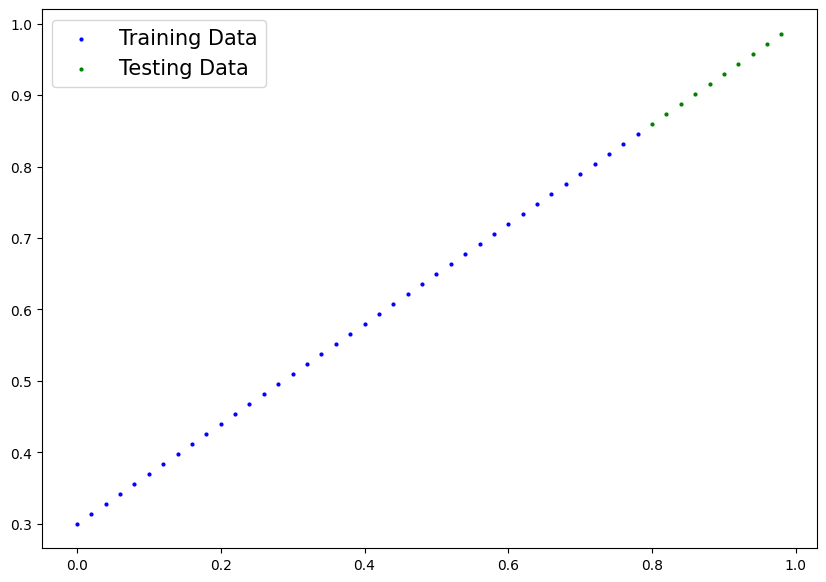

In [12]:
plot_predictions()

##Building pytorch model

We will be building a linear regression model

our model starts with random values and adjusts these values to get ideal values

We can do this in two ways

1) gradient descent

2) back propogation

In [21]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad = True,
                                           dtype=torch.float)) #We have requires grad to True for gradient descent, pytorch will keep track of the gradients of the weights parameter and update them through gradient descent and back propogration
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias #This is the linear regression formula